# Day 21: Mini Project – Spam/Email Classifier 📧

### Objective:
Build a classifier to detect **spam vs ham (not spam)** emails using **Naive Bayes**.

### Steps:
1. Load dataset
2. Explore data
3. Preprocess text
4. Convert text to features (Bag of Words / TF-IDF)
5. Train-test split
6. Train Naive Bayes classifier
7. Evaluate model
8. Predict new emails


In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 2. Load Dataset

We can use the classic **SMS Spam Collection Dataset** (small, easy for demo).  

- Columns: `label` (spam/ham), `message` (text)


In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label','message'])

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 3. Explore Data


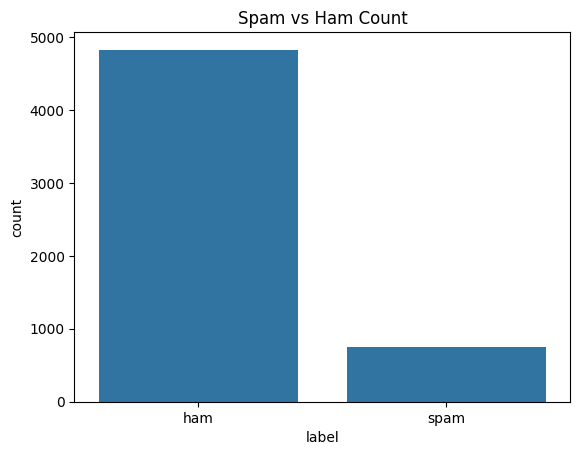

label
ham     4825
spam     747
Name: count, dtype: int64


In [3]:
# Count spam vs ham
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Count")
plt.show()

print(df['label'].value_counts())


## 4. Preprocess Text
- Convert text to lowercase
- Remove punctuation (optional)


In [4]:
import string

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean_message'] = df['message'].apply(preprocess_text)
df.head()


,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## 5. Feature Extraction
- Convert text to numerical features using **CountVectorizer** (Bag of Words)


In [5]:
cv = CountVectorizer()
X = cv.fit_transform(df['clean_message'])
y = df['label']


## 6. Train-Test Split


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 7. Train Naive Bayes Classifier


In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## 8. Evaluate Model


Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.91      0.93      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



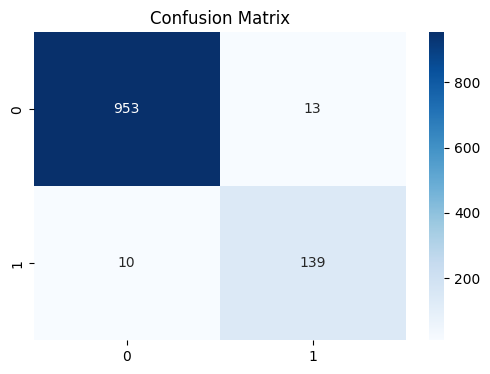

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## 9. Predict New Emails


In [16]:
new_emails = ["Congratulations! You won a free iPhone!", 
              "Hi friend, are we meeting tomorrow?", 
              "Claim your free lottery prize now",
              "Don't forget our lunch appointment at 1 PM.",
              "welcome to the new world of crypto investment click here to join now",
              "Hey, just checking in to see how you're doing.",
              "Limited time offer! Get 50% off on all products.",
              "Can you send me the report by tonight?",
              "URGENT! Your account has been compromised. Click here to secure it.",]

# Preprocess
new_emails_clean = [preprocess_text(msg) for msg in new_emails]

# Convert to features
new_X = cv.transform(new_emails_clean)

# Predict
predictions = model.predict(new_X)
for msg, label in zip(new_emails, predictions):
    print(f"Message: {msg}\nPredicted: {label}\n")


Message: Congratulations! You won a free iPhone!
Predicted: spam

Message: Hi friend, are we meeting tomorrow?
Predicted: ham

Message: Claim your free lottery prize now
Predicted: spam

Message: Don't forget our lunch appointment at 1 PM.
Predicted: ham

Message: welcome to the new world of crypto investment click here to join now
Predicted: spam

Message: Hey, just checking in to see how you're doing.
Predicted: ham

Message: Limited time offer! Get 50% off on all products.
Predicted: ham

Message: Can you send me the report by tonight?
Predicted: ham

Message: URGENT! Your account has been compromised. Click here to secure it.
Predicted: spam



### 🔑 Key Takeaways:
- Text data must be **cleaned and vectorized** before ML.
- **Naive Bayes** works well for spam classification.
- Bag of Words or TF-IDF can be used as features.
- Accuracy can be improved with better preprocessing (stopwords removal, stemming, n-grams).
